In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m 

In [4]:
df = pd.read_csv('E:/ML and DL/ML/Data_csv/Classified Data',index_col=0)
df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [5]:
df.dtypes

WTT             float64
PTI             float64
EQW             float64
SBI             float64
LQE             float64
QWG             float64
FDJ             float64
PJF             float64
HQE             float64
NXJ             float64
TARGET CLASS      int64
dtype: object

In [6]:
df.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
WTT,1000.0,0.949682,0.289635,0.174412,0.742358,0.940475,1.163295,1.721779
PTI,1000.0,1.114303,0.257085,0.441398,0.942071,1.118486,1.307904,1.833757
EQW,1000.0,0.834127,0.291554,0.170924,0.615451,0.813264,1.028340,1.722725
SBI,1000.0,0.682099,0.229645,0.045027,0.515010,0.676835,0.834317,1.634884
LQE,1000.0,1.032336,0.243413,0.315307,0.870855,1.035824,1.198270,1.650050
QWG,1000.0,0.943534,0.256121,0.262389,0.761064,0.941502,1.123060,1.666902
FDJ,1000.0,0.963422,0.255118,0.295228,0.784407,0.945333,1.134852,1.713342
PJF,1000.0,1.071960,0.288982,0.299476,0.866306,1.065500,1.283156,1.785420
HQE,1000.0,1.158251,0.293738,0.365157,0.934340,1.165556,1.383173,1.885690
NXJ,1000.0,1.362725,0.204225,0.639693,1.222623,1.375368,1.504832,1.893950


<AxesSubplot:>

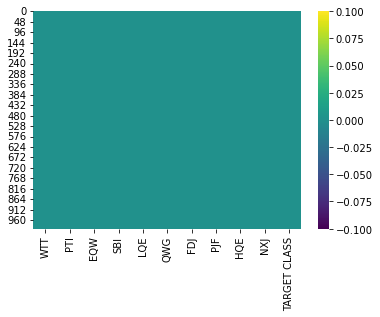

In [7]:
sns.heatmap(df.isnull(),cmap = 'viridis')

In [8]:
df.isna().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [11]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [12]:
from datasist.structdata import detect_outliers

feature_df = df[['WTT','PTI','EQW','SBI','LQE','QWG','FDJ','PJF','HQE','NXJ']]

for col in feature_df:
    outliers = detect_outliers(df,0,[col])
    print(f'number of outliers in {col} : ',len(outliers))

number of outliers in WTT :  0
number of outliers in PTI :  0
number of outliers in EQW :  3
number of outliers in SBI :  6
number of outliers in LQE :  2
number of outliers in QWG :  1
number of outliers in FDJ :  3
number of outliers in PJF :  0
number of outliers in HQE :  0
number of outliers in NXJ :  7


In [13]:
for col in feature_df:
    if col == 'TARGET CLASS':
        pass
    else:
        outliers = detect_outliers(df,0,[col])
        col_median = df[col].median()
        df[col].iloc[outliers] = col_median

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
for col in feature_df:
    outliers = detect_outliers(df,0,[col])
    print(f'number of outliers in {col} : ',len(outliers))

number of outliers in WTT :  0
number of outliers in PTI :  0
number of outliers in EQW :  0
number of outliers in SBI :  2
number of outliers in LQE :  0
number of outliers in QWG :  0
number of outliers in FDJ :  1
number of outliers in PJF :  0
number of outliers in HQE :  0
number of outliers in NXJ :  0


In [15]:
df['TARGET CLASS'].value_counts()

1    500
0    500
Name: TARGET CLASS, dtype: int64

In [16]:
df['TARGET CLASS'].value_counts() * 100 / len(df)

1    50.0
0    50.0
Name: TARGET CLASS, dtype: float64

<AxesSubplot:>

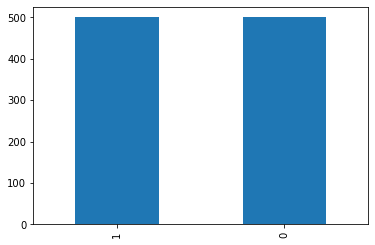

In [17]:
df['TARGET CLASS'].value_counts().plot(kind = 'bar')

In [18]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['WTT','PTI','EQW','SBI','LQE','QWG','FDJ','PJF','HQE','NXJ']
df[columns] = scaler.fit_transform(df[columns])

In [20]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,-0.123542,0.185907,-0.916368,0.354429,-1.048006,-2.314810,-0.799916,-1.482368,-0.949719,-0.691037,1
1,-1.084836,-0.430348,-1.029729,0.672375,-0.454331,-1.154495,-1.134798,-0.202240,-1.828051,0.637280,0
2,-0.788702,0.339318,0.314635,0.808061,2.042757,-0.870810,2.640317,0.285707,-0.682494,-0.415568,0
3,0.982841,1.060193,-0.620475,0.672283,0.450784,-0.265450,1.780341,1.066491,1.241325,-1.089171,1
4,1.139275,-0.640392,-0.710064,-0.037393,0.823920,-0.937694,0.612844,-1.472352,1.040772,0.263454,1


In [21]:
feature_df = df[['WTT','PTI','EQW','SBI','LQE','QWG','FDJ','PJF','HQE','NXJ']]
x = np.asarray(feature_df)
y = np.asarray(df['TARGET CLASS'])

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[147   9]
 [  5 139]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       156
           1       0.94      0.97      0.95       144

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8566666666666667
[[131  25]
 [ 18 126]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       156
           1       0.83      0.88      0.85       144

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = [1,2,3,4,5,6,7,8,9,int(m.sqrt(len(x_train)))]
for item in k :
    print(f'where k is = {item}')
    model = KNeighborsClassifier(n_neighbors = item)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('accuracy is {}'.format(accuracy_score(y_test,y_pred)))
    print('-'*30)

where k is = 1
accuracy is 0.9133333333333333
------------------------------
where k is = 2
accuracy is 0.92
------------------------------
where k is = 3
accuracy is 0.93
------------------------------
where k is = 4
accuracy is 0.9333333333333333
------------------------------
where k is = 5
accuracy is 0.9366666666666666
------------------------------
where k is = 6
accuracy is 0.95
------------------------------
where k is = 7
accuracy is 0.9466666666666667
------------------------------
where k is = 8
accuracy is 0.9566666666666667
------------------------------
where k is = 9
accuracy is 0.9466666666666667
------------------------------
where k is = 26
accuracy is 0.9466666666666667
------------------------------


In [26]:
model = KNeighborsClassifier(n_neighbors = 8)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9566666666666667
[[148   8]
 [  5 139]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       156
           1       0.95      0.97      0.96       144

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [27]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

91.66666666666666
[[139  17]
 [  8 136]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       156
           1       0.89      0.94      0.92       144

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [28]:
from sklearn.svm import SVC
kernel = ['linear','poly','rbf','sigmoid']
for item in kernel:
    print(f'kernel is {item}')
    if item == 'poly':
        model = SVC(kernel = item,degree = 2)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        print('accuracy_score is :',accuracy_score(y_test,y_pred))
    elif item == 'rbf':
        model = SVC(kernel = item,degree = 4)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        print('accuracy_score is :',accuracy_score(y_test,y_pred))
    else :
        model = SVC(kernel = item)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        print('accuracy_score is :',accuracy_score(y_test,y_pred))

kernel is linear
accuracy_score is : 0.9533333333333334
kernel is poly
accuracy_score is : 0.6166666666666667
kernel is rbf
accuracy_score is : 0.94
kernel is sigmoid
accuracy_score is : 0.95


In [30]:
model = SVC(kernel = 'linear')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

95.33333333333334
[[147   9]
 [  5 139]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       156
           1       0.94      0.97      0.95       144

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
parameters = {'n_neighbors': [1, 2, 5, 10], 'weights': ['uniform', 'distance'], 'metric': ['manhattan', 'euclidean', 'chebyshev']}
def grid_search(estimator, parameters, X, y):
    
    scoring = ['accuracy', 'precision', 'recall']
    kf = KFold(5)
    
    clf = GridSearchCV(estimator, parameters, cv=kf, scoring=scoring, refit="accuracy", n_jobs=-1)
    clf.fit(X, y)
    
    i = clf.best_index_
    best_precision = clf.cv_results_['mean_test_precision'][i]
    best_recall = clf.cv_results_['mean_test_recall'][i]
    
    print('Best score (accuracy): {}'.format(clf.best_score_))
    print('Mean precision: {}'.format(best_precision))
    print('Mean recall: {}'.format(best_recall))
    print('Best parametes: {}'.format(clf.best_params_))
    
    return clf.best_estimator_
from sklearn.neighbors import KNeighborsClassifier
grid_search(KNeighborsClassifier(n_jobs=-1),parameters,x_train,y_train)

Best score (accuracy): 0.9357142857142856
Mean precision: 0.9179678773099826
Mean recall: 0.9609602795358796
Best parametes: {'metric': 'chebyshev', 'n_neighbors': 10, 'weights': 'distance'}


KNeighborsClassifier(metric='chebyshev', n_jobs=-1, n_neighbors=10,
                     weights='distance')

In [32]:
knn = KNeighborsClassifier(metric = 'chebyshev', n_neighbors = 10, weights = 'distance')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

94.0
[[144  12]
 [  6 138]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       156
           1       0.92      0.96      0.94       144

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [38]:
from sklearn.svm import SVC
clf = SVC()
params = {'C':[1,5,7] ,'kernel':['linear','poly','rbf','sigmoid']}
grid_search = GridSearchCV(clf,param_grid = params,scoring = 'accuracy',cv = 5)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [39]:
clf = SVC(C = 1, kernel = 'linear')
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

95.33333333333334
[[147   9]
 [  5 139]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       156
           1       0.94      0.97      0.95       144

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)
search.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.01, 'n_estimators': 2000, 'random_state': 1}

In [41]:
ada = AdaBoostClassifier(learning_rate = 0.01, n_estimators = 2000, random_state = 1)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

94.0
[[146  10]
 [  8 136]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       156
           1       0.93      0.94      0.94       144

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [42]:
from catboost import CatBoostClassifier
CBC = CatBoostClassifier()
parameters = {'depth'         : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(x_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 560.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\catboost\core.py", line 5007, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\DELL\anaconda3\lib\site-packages\catboost\core.py", line 2278, in _fi

0:	learn: 0.6749008	total: 53.8ms	remaining: 5.33s
1:	learn: 0.6585933	total: 55.9ms	remaining: 2.74s
2:	learn: 0.6428935	total: 58.9ms	remaining: 1.9s
3:	learn: 0.6285031	total: 61.4ms	remaining: 1.47s
4:	learn: 0.6121203	total: 64.1ms	remaining: 1.22s
5:	learn: 0.5956805	total: 66.2ms	remaining: 1.04s
6:	learn: 0.5813186	total: 68ms	remaining: 903ms
7:	learn: 0.5668572	total: 69.9ms	remaining: 804ms
8:	learn: 0.5530455	total: 71.7ms	remaining: 725ms
9:	learn: 0.5409409	total: 73.7ms	remaining: 664ms
10:	learn: 0.5285960	total: 75.7ms	remaining: 612ms
11:	learn: 0.5168583	total: 77.8ms	remaining: 571ms
12:	learn: 0.5049085	total: 79.9ms	remaining: 534ms
13:	learn: 0.4960898	total: 81.9ms	remaining: 503ms
14:	learn: 0.4866044	total: 83.9ms	remaining: 475ms
15:	learn: 0.4757393	total: 85.7ms	remaining: 450ms
16:	learn: 0.4668973	total: 87.7ms	remaining: 428ms
17:	learn: 0.4579115	total: 89.5ms	remaining: 408ms
18:	learn: 0.4491867	total: 91.6ms	remaining: 391ms
19:	learn: 0.4413538	tota

In [43]:
cbc = CatBoostClassifier(depth = 6,iterations = 100 ,learning_rate = 0.04)
cbc.fit(x_train,y_train)
y_pred = cbc.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0:	learn: 0.6749008	total: 2.15ms	remaining: 213ms
1:	learn: 0.6585933	total: 4.36ms	remaining: 213ms
2:	learn: 0.6428935	total: 6.32ms	remaining: 204ms
3:	learn: 0.6285031	total: 8.79ms	remaining: 211ms
4:	learn: 0.6121203	total: 10.9ms	remaining: 208ms
5:	learn: 0.5956805	total: 12.7ms	remaining: 200ms
6:	learn: 0.5813186	total: 14.8ms	remaining: 197ms
7:	learn: 0.5668572	total: 16.6ms	remaining: 191ms
8:	learn: 0.5530455	total: 19.1ms	remaining: 193ms
9:	learn: 0.5409409	total: 21.2ms	remaining: 191ms
10:	learn: 0.5285960	total: 23.5ms	remaining: 190ms
11:	learn: 0.5168583	total: 26.1ms	remaining: 191ms
12:	learn: 0.5049085	total: 28.9ms	remaining: 193ms
13:	learn: 0.4960898	total: 30.8ms	remaining: 189ms
14:	learn: 0.4866044	total: 33.7ms	remaining: 191ms
15:	learn: 0.4757393	total: 36.1ms	remaining: 190ms
16:	learn: 0.4668973	total: 38.1ms	remaining: 186ms
17:	learn: 0.4579115	total: 39.6ms	remaining: 181ms
18:	learn: 0.4491867	total: 41.3ms	remaining: 176ms
19:	learn: 0.4413538	t

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(random_state=42)
gbr_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 80, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5],
    'random_state': [42]
}

gbr_search = GridSearchCV(gbr, param_grid=gbr_params, cv=5, scoring='accuracy', n_jobs=-1)
gbr_search.fit(x_train, y_train)
best_mse = gbr_search.best_score_
best_rmse = best_mse

print('Best score: {}, Best params: {}'.format(best_rmse, gbr_search.best_params_))

Best score: 0.9242857142857142, Best params: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300, 'random_state': 42}


In [45]:
gbr = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 3, min_samples_leaf = 1, min_samples_split = 3, n_estimators = 300,random_state=42)
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

94.33333333333334
[[146  10]
 [  7 137]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       156
           1       0.93      0.95      0.94       144

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [46]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42)
lgbm_params = {
    'num_leaves': [25, 31, 35],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 7, 11],
    'random_state': [42]
}

lgbm_search = GridSearchCV(lgbm, param_grid=lgbm_params, cv=5, scoring='accuracy', n_jobs=-1)
lgbm_search.fit(x_train, y_train)
best_mse = lgbm_search.best_score_
best_rmse = best_mse

print('Best score: {}, Best params: {}'.format(best_rmse, lgbm_search.best_params_))

Best score: 0.9214285714285714, Best params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 500, 'num_leaves': 25, 'random_state': 42}


In [47]:
lgbm = LGBMClassifier(learning_rate = 0.05, max_depth = 3, n_estimators = 500, num_leaves = 25,random_state=42)
lgbm.fit(x_train,y_train)
y_pred = lgbm.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

95.33333333333334
[[148   8]
 [  6 138]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       156
           1       0.95      0.96      0.95       144

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5],
    'random_state': [42]
}

rf_search = GridSearchCV(rf, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_search.fit(x_train, y_train)
best_mse = rf_search.best_score_
best_rmse = best_mse

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), rf_search.best_params_))

Best score: 0.9286, Best params: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'random_state': 42}


In [49]:
rf = RandomForestClassifier(max_depth = 9, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500, random_state = 42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred) * 100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

94.33333333333334
[[149   7]
 [ 10 134]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       156
           1       0.95      0.93      0.94       144

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [50]:
import joblib 
joblib.dump(clf,'D:/projects/ML/Classified Data/model.h5')
joblib.dump(scaler,'D:/projects/ML/Classified Data/scaler.h5')

['D:/projects/ML/Classified Data/scaler.h5']